##################################################################################################################################################################################$$Player-Market-Valuation$$ 
Football clubs face the challenge of predicting the market value of professional football players during transfer windows, which involves substantial financial investments. While Transfermarkt.com,Transfermarkt,CIES Football Observatory,Soccerex,Forbes,Goal.com relies on football experts' crowdsourcing to determine players' values, such approaches are infrequently updated and prone to human errors. As a result, data scientists worldwide have turned to a data-driven approach to create datasets and develop estimating methods using statistical analysis. In this project, I constructed a dataset consisting of 16060 players from 933 World-Wide Football teams and estimated players' market values using regression analysis. 
                                      

In [4]:
#Firstly I need to import libraries and setting some default display options

# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


import statsmodels.api as sm
from sklearn import metrics
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

$$WEB-SCRAPING$$

First we need required datas. For this project, I obtained data from the website "Sofifa" {Sofifa is a website that provides comprehensive information about professional football players, including their performance statistics, personal details, and transfer history. The website is dedicated to the FIFA video game series and is widely used by gamers, football fans, and football clubs alike. Sofifa provides up-to-date player ratings, which are calculated based on a player's recent performances and are used by the FIFA video game series to determine player abilities and rankings}.
I used a technique called "web scraping" to collect data from Sofifa and convert it into a useful format. Web scraping involves extracting data from websites and converting it into a format like a data frame.



In [ ]:
player_list = []

# Set up the Selenium driver
driver = webdriver.Chrome()

# Loop over multiple pages, Main page includes players characteristics data and 
# each page has 60 players. So I need to build loop to get all players from sofifa. 
# I used BeautifulSoup library to scrape data.
for i in range(0, 40000, 60):
    # Load the webpage
    url = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    driver.get(url)

    # Wait for the table to load
    wait = WebDriverWait(driver, 10)
    table = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table tbody")))

    # Extract the page source
    page_source = driver.page_source

    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, "lxml")

    # Find all the rows in the table
    rows = soup.find_all("tr")

    # Extract the data from each row
    for row in rows:
        cells = row.find_all('td')
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        player_list.append(cells_sub)

# Convert the list of data to a DataFrame
result = pd.DataFrame(player_list)

# Close the driver
driver.quit()

In [ ]:
# After scraping process, I checked number of rows and dropped duplicate rows.
#  Finally I scraped 18674 players from sofifa web page.
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Unique")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

In [ ]:
#Saving result data frame as a Pickle File
result.to_pickle("raw-scrape")

Data cleaning and organizing is an essential step in any data analysis project. It involves identifying and correcting errors, inconsistencies, and missing values in the data to ensure that it is accurate and reliable. In this project, I performed data cleaning on the dataset to prepare it for analysis.

Split columns,
Remove unwanted characters (such as \n)
Converting height column to cm
Converting weight column to kg
Converting Value, Wage and Release_Clause to decimal money. (Including €, M and K characters)
Deleting some rows that columns is blank
Converting International Reputation column (5 ★) to integer (5)
Converting all numeric columns to integer or float

By performing data cleaning, I was able to ensure that the dataset was accurate, consistent, and free of errors, allowing me to conduct meaningful analysis and draw reliable conclusions from the data.

Overall, data cleaning is a critical step in the data analysis process, and it ensures that the data is reliable and accurate, which is essential for making informed decisions based on the data.

In [ ]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

In [ ]:
# Setting columns names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [ ]:
result = pd.read_pickle("raw-scrape")

#Data Cleaning

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

result_master["PHY"] = result_master["PHY"].str.extract(r"(\d+)")

result_master

In [ ]:
#Cleaning Height,Weight and age attr.

result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

result_master["Height"] = result_master["Height"].str.extract(r"(\d+)")
result_master["Weight"] = result_master["Weight"].str.extract(r"(\d+)")
result_master

In [ ]:
#Cleaning to every money related column to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)
result_master

In [ ]:
#Deleting some rows that composure columns is blank (Legend Players)
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [ ]:
#Checking columns dtypes
result_master.info()

In [ ]:
#Saving Final Player List as Pickle
result_master.to_pickle("scrape-final")
player_list= pd.read_pickle("scrape-final")
player_list

# Exploratory Data Analyis

After completing data cleaning, the next step in any data analysis project is Exploratory Data Analysis (EDA). EDA is a process that involves examining and understanding the data by generating visualizations, identifying patterns, and testing hypotheses. In this project, I performed EDA on the cleaned dataset to gain insights into the data and identify relationships between variables.


In [48]:
player_list= pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/Valuation/scrape-final")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,CM,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,CB,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,LW,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [70]:
#Converting to int dtypes

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Height',
 'Weight',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    player_list[col] = player_list[col].astype('int')

In [49]:
# One-hot encoding is a technique used to convert categorical variables into numerical variables that can be used as input to machine learning models. 
# One-hot encoding creates a new binary column for each unique category in the original categorical variable. 
# The resulting one-hot encoded columns can be used as input to machine learning models, as they are numerical variables that can be used in mathematical calculations.
# One-hot encoding is often used with categorical variables that have more than two categories. However, one potential issue with one-hot encoding is that it can inc
# rease the dimensionality of the dataset, especially if there are many unique categories. This can lead to the curse of dimensionality and make it more difficult to train 
# machine learning models. To address this issue, other encoding techniques such as target encoding or binary encoding can be used.

# Here we intoduce one hot to column Position and Foot


# Define the mapping from positions to categories
position_map = {
    "GK": 'gk',
    'CB': 'def',
    'RB': 'def',
    'LB': 'def',
    'RWB': 'def',
    'LWB': 'def',
    'CAM': 'mid',
    'CM': 'mid',
    'CDM': 'mid',
    'RM': 'mid',
    'LM': 'mid',
    'ST': 'for',
    'LW': 'for',
    'RW': 'for',
    'CF': 'for',
}

# data is a pandas DataFrame with the 'position' column
player_list['Position'] = player_list['Position'].str.strip() # remove leading/trailing white space
player_list['Position'] = player_list['Position'].replace(position_map)

# Print the resulting player_listFrame
print(player_list)

# data is a pandas DataFrame with the 'position' column
one_hot = pd.get_dummies(player_list['Position'], prefix='Position')

# Append the one-hot encoded variables to the original dataFrame
player_list = pd.concat([player_list, one_hot], axis=1)

# data is a pandas DataFrame with the 'foot' column
one_hot = pd.get_dummies(player_list['Foot'], prefix='Foot')

# Append the one-hot encoded variables to the original DataFrame
player_list = pd.concat([player_list, one_hot], axis=1)
player_list

                       Name  Age  Overall  Potential  \
0        A. Mac Allister      23       80         84   
5                O. Kökçü     21       81         86   
6                  E. Dick    27       58         60   
8             Gabri Veiga     20       69         85   
9           A. Al Musrati     26       81         84   
...                     ...  ...      ...        ...   
18668   22 Hwang Jung Wook    21       49         62   
18669       Kim Chae Woon     22       61         72   
18670       Kim Jeong hoon    21       57         68   
18671  Alejandro Garnacho     18       70         86   
18672             Fresneda    17       69         85   

                             Team Height Weight    Foot  Best_Overall  \
0      Brighton &amp; Hove Albion    176     72   Right            82   
5                       Feyenoord    175     68   Right            83   
6                Minnesota United    196     93   Right            58   
8                   Celta de Vigo  

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_def,Position_for,Position_gk,Position_mid,Foot_ Left,Foot_ Right
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,mid,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71,0,0,0,1,0,1
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,mid,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77,0,0,0,1,0,1
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,gk,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58,0,0,1,0,0,1
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,mid,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62,0,0,0,1,0,1
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,mid,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,def,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51,1,0,0,0,0,1
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,def,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54,1,0,0,0,1,0
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,gk,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57,0,0,1,0,0,1
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,for,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53,0,1,0,0,0,1


In [50]:
# Diffrent Teams
player_list.Team.value_counts()

River Plate             86
Liverpool               76
Universidad Católica    58
Manchester United       45
Aucas                   45
                        ..
Novara                   1
Akhmat Grozny            1
Limerick                 1
Albirex Niigata          1
Catania                  1
Name: Team, Length: 933, dtype: int64

In [51]:
#Top 5 Valuable Player
player_list.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
84,K. Mbappé,23,Paris Saint Germain,190.5
95,F. de Jong,25,FC Barcelona,116.5
38,Vinícius Jr.,21,Real Madrid,109.0
186,K. De Bruyne,31,Manchester City,107.5
429,Rúben Dias,25,Manchester City,107.5


In [52]:
#Top 5 Rating Player
player_list.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
15,L. Messi,35,Paris Saint Germain,91
84,K. Mbappé,23,Paris Saint Germain,91
186,K. De Bruyne,31,Manchester City,91
205,K. Benzema,34,Real Madrid,91
236,R. Lewandowski,33,FC Barcelona,91


In [53]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
Paris Saint Germain,42.553182
Manchester City,36.895385
Real Madrid,29.820667
FC Barcelona,27.236970
FC Bayern München,25.510385


In [54]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Liverpool,961.86
Manchester City,959.28
Paris Saint Germain,936.17
FC Barcelona,898.82
Real Madrid,894.62


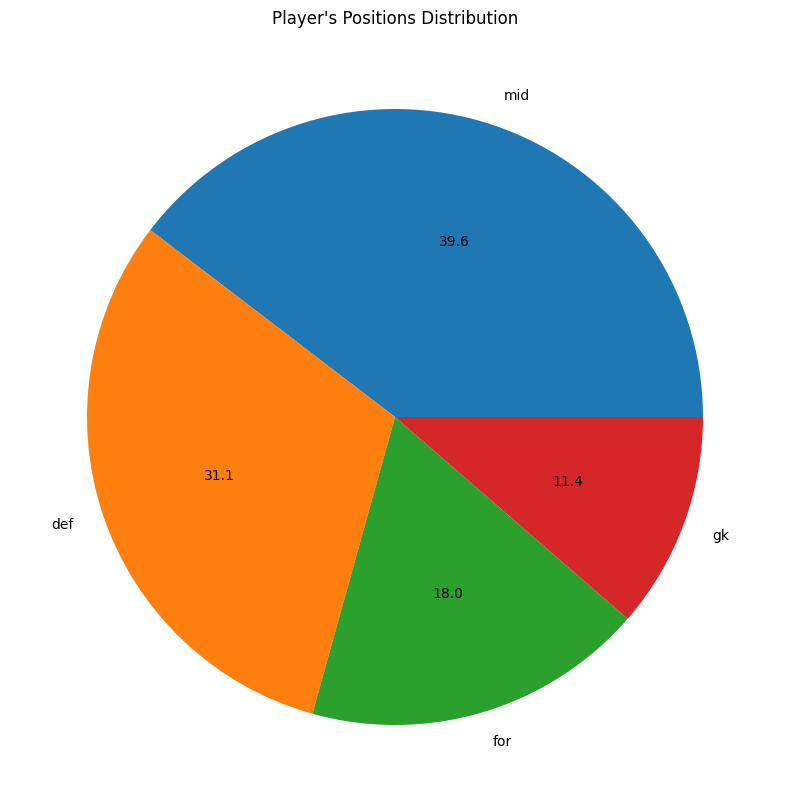

In [55]:
# Player’s Position Distribution
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

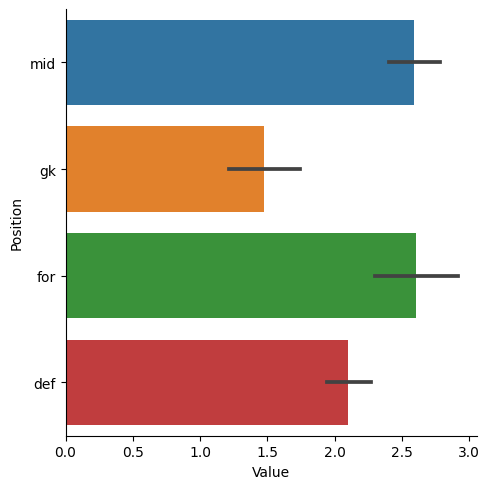

In [56]:
# Mean Value of Each Position
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()

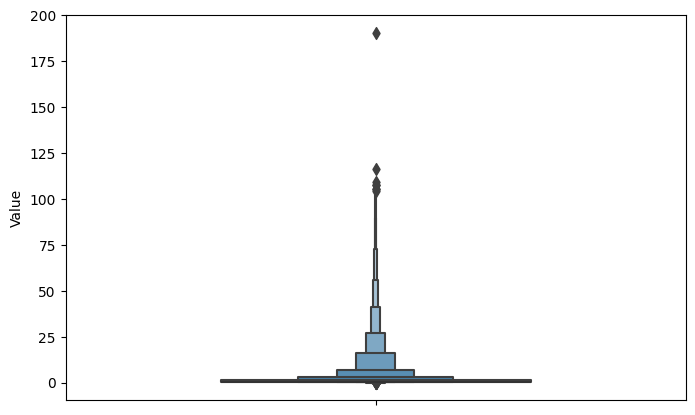

In [57]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=player_list, width=0.5)
plt.show()

C:\Users\adhna\AppData\Local\Temp\ipykernel_2464\515352127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')


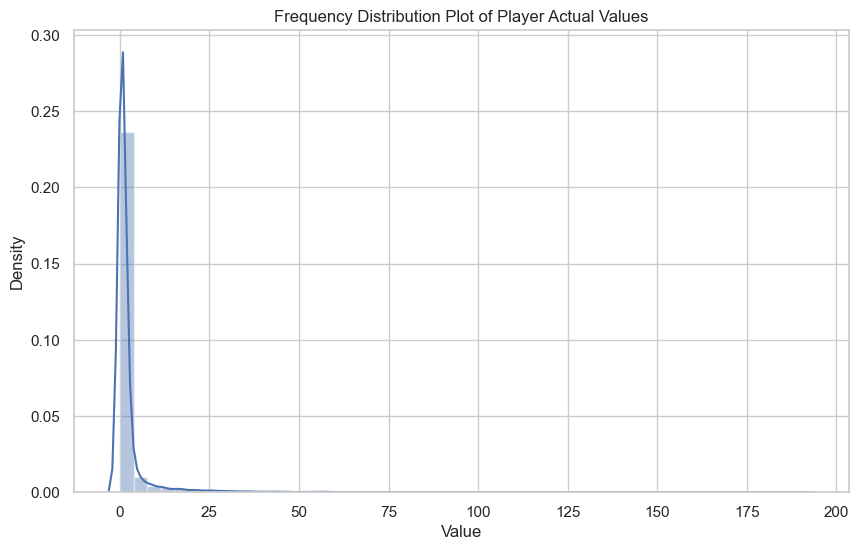

In [58]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

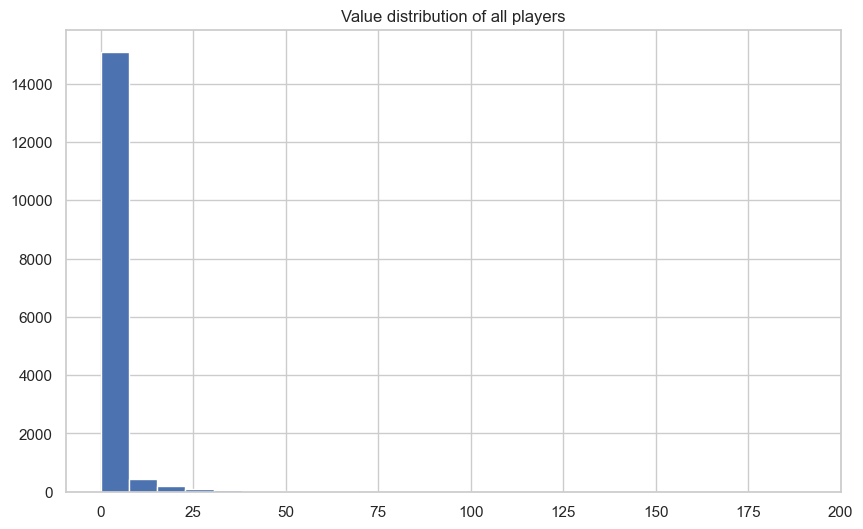

In [59]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

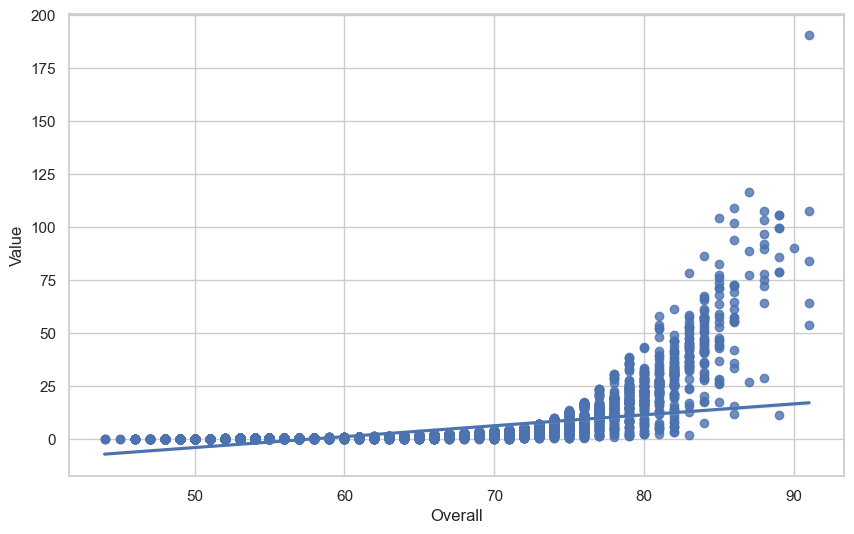

In [60]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

C:\Users\adhna\AppData\Local\Temp\ipykernel_2464\2986765892.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(player_list.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)


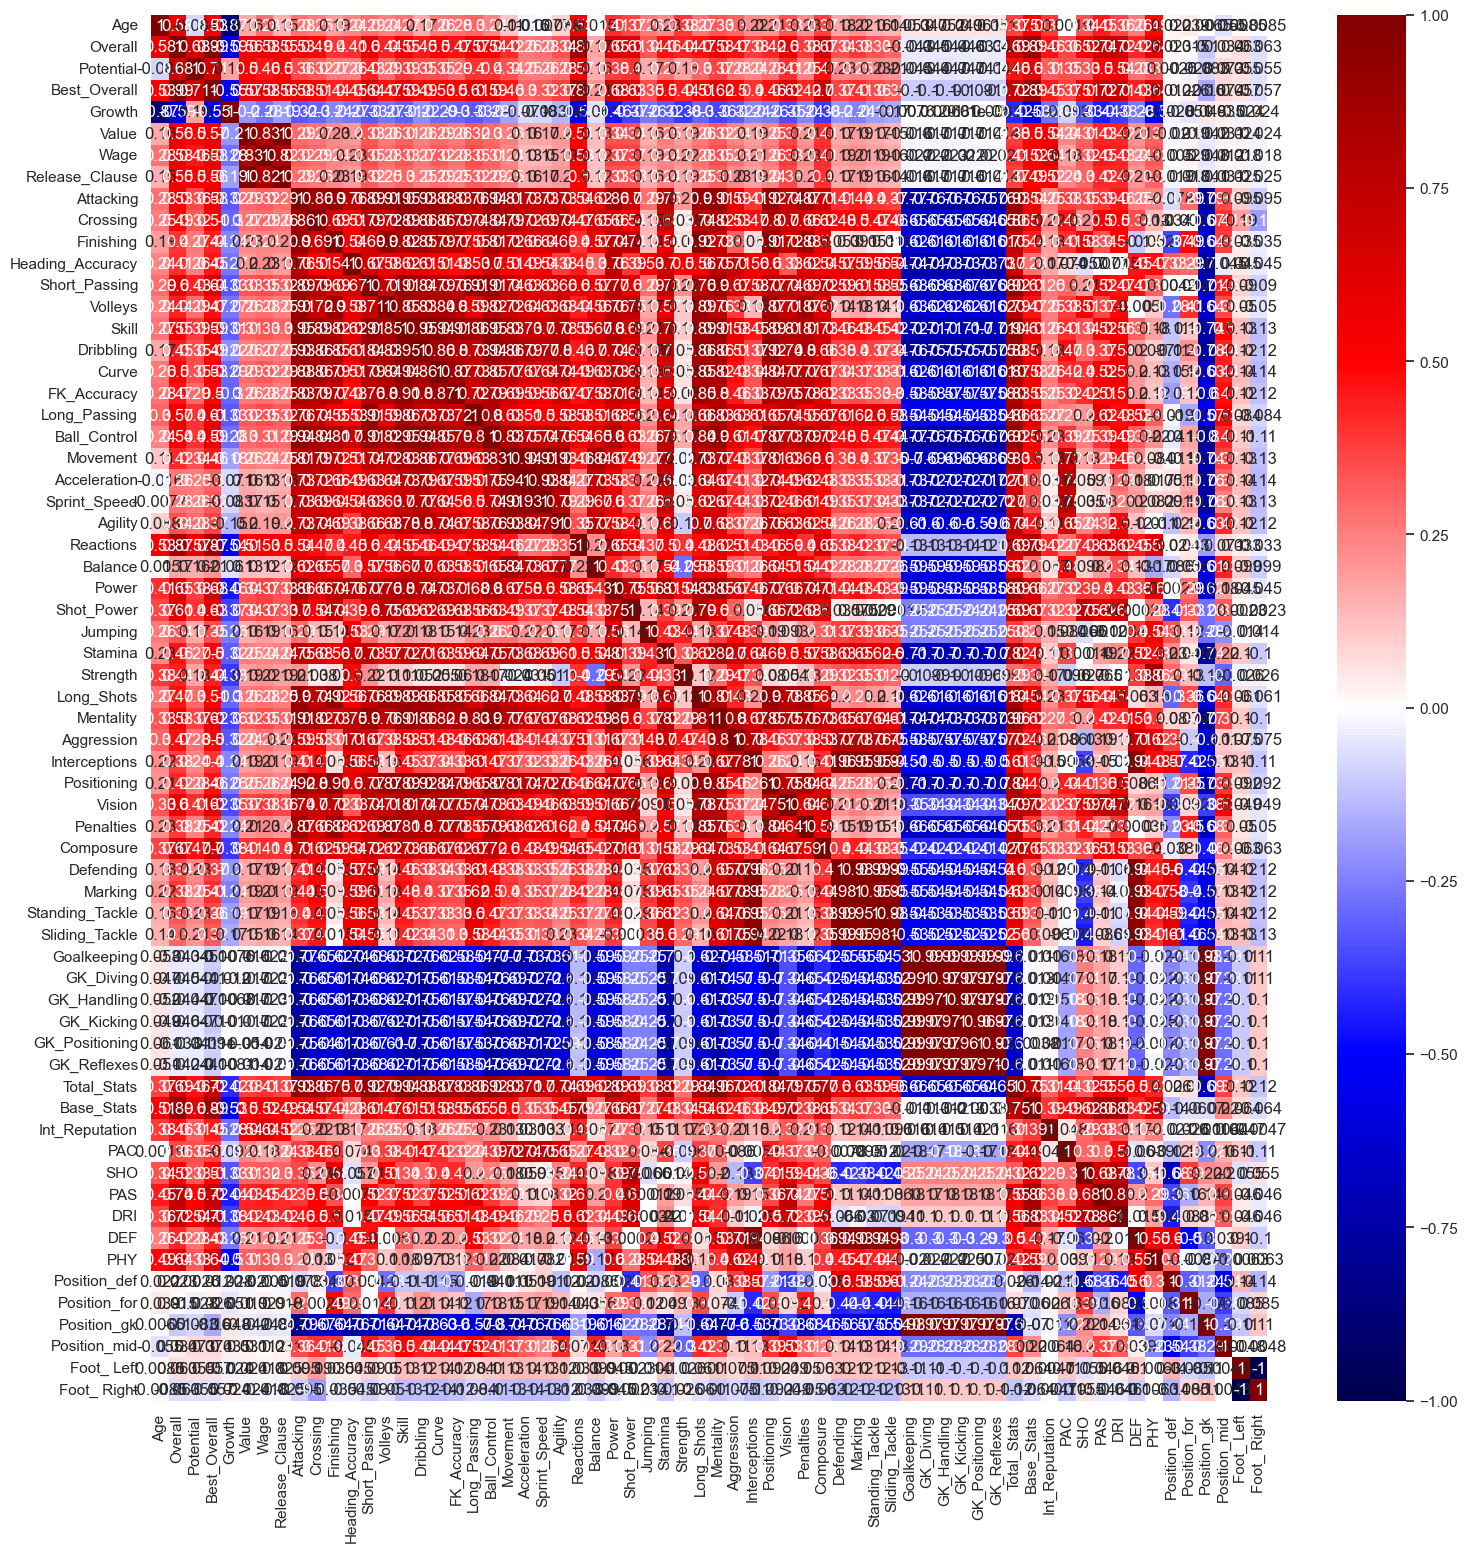

In [61]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 18))
sns.set(style="whitegrid")
sns.heatmap(player_list.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

After completing data cleaning and exploratory data analysis, the next step in the data analysis process is to build a model. In this project, I used a regression model to estimate the market value of football players based on their performance statistics.

Regression models are a type of predictive model that uses statistical techniques to analyze the relationships between variables and make predictions about future outcomes. In this project, I used a linear regression model to estimate the market value of football players based on their performance statistics, such as goals scored, assists, and minutes played.

The regression model involved several steps, including:

Feature selection: I selected the most relevant features from the dataset that would have the most significant impact on the player's market value.

Splitting the data: I split the data into training and testing sets, where the model was trained on the training set and evaluated on the testing set.

Building the model: I trained a linear regression model on the training data, using the selected features to predict the players' market value.

Evaluating the model: I evaluated the performance of the model on the testing data, measuring metrics such as mean squared error and R-squared to determine how well the model performed in predicting the market values.

By using a regression model, I was able to estimate the market value of football players based on their performance statistics, providing valuable insights for football clubs, agents, and scouts in making informed decisions during transfer windows.

In [97]:
# player_list= pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/Valuation/scrape-final")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_def,Position_for,Position_gk,Position_mid,Foot_ Left,Foot_ Right
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,mid,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71,0,0,0,1,0,1
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,mid,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77,0,0,0,1,0,1
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,gk,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58,0,0,1,0,0,1
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,mid,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62,0,0,0,1,0,1
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,mid,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,def,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51,1,0,0,0,0,1
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,def,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54,1,0,0,0,1,0
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,gk,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57,0,0,1,0,0,1
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,for,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53,0,1,0,0,0,1


OLS (ordinary least squares) regression is a statistical technique used to model the relationship between one or more predictor variables and a response variable. In addition to predicting the response variable, OLS regression can also be used for feature selection, which involves identifying the most important predictor variables for the model.

One approach to performing feature selection using OLS regression is to use the p-value of each predictor variable's coefficient. The p-value measures the probability of observing a coefficient as extreme as the one estimated by the model, given the null hypothesis that the true coefficient is zero. If the p-value is less than a pre-defined significance level (e.g., 0.05), then we can reject the null hypothesis and conclude that the variable is statistically significant in predicting the response variable.

Using this approach, we can perform backward elimination or forward selection to iteratively add or remove predictor variables from the model based on their p-values. For backward elimination, we start with a model that includes all predictor variables, and iteratively remove the variable with the highest p-value until all remaining variables have p-values below the significance level. For forward selection, we start with an empty model, and iteratively add the variable with the lowest p-value until all remaining variables have p-values above the significance level.

Another approach to feature selection using OLS regression is to use the adjusted R-squared statistic. The adjusted R-squared measures the proportion of variance in the response variable that is explained by the predictor variables, adjusted for the number of predictor variables in the model. We can compare the adjusted R-squared of models with different subsets of predictor variables to identify the subset that results in the highest adjusted R-squared.

It is important to note that feature selection using OLS regression has some limitations. First, it assumes that the relationship between the predictor variables and response variable is linear, which may not always be the case. Second, it assumes that the predictor variables are independent of each other, which may not be true if there is multicollinearity between the variables. Finally, feature selection using OLS regression can be computationally intensive if there are many predictor variables, which can make it difficult to find the optimal subset of variables.

In [102]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

C:\Users\adhna\AppData\Local\Temp\ipykernel_2464\3573284818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = player_list.corr()


,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Position_def,Position_for,Position_gk,Position_mid,Foot_ Left,Foot_ Right
Age,1.000000,0.578253,-0.084337,0.058555,0.226104,0.529950,-0.871325,0.164331,0.280022,0.149089,0.277947,0.251012,0.192667,0.238840,0.286837,0.243116,0.265677,0.165136,0.259382,0.280016,0.300922,0.236476,0.111120,-0.015661,-0.007719,0.087798,0.530735,0.014912,0.413209,0.366120,0.258979,0.229555,0.383514,0.266595,0.331436,0.302843,0.221456,0.213726,0.332066,0.225028,0.374766,0.176835,0.217195,0.163042,0.143001,0.052524,0.047112,0.051631,0.048609,0.061300,0.050697,0.373442,0.508305,0.383536,0.001866,0.341046,0.446857,0.363885,0.255703,0.485853,0.021505,0.039305,0.006461,-0.055382,0.008507,-0.008507
Overall,0.578253,1.000000,0.683262,0.048908,0.160775,0.989523,-0.590123,0.561993,0.583692,0.552593,0.533523,0.489986,0.396365,0.410274,0.596230,0.435703,0.546098,0.450262,0.500048,0.466196,0.573596,0.539897,0.417548,0.260394,0.275516,0.340296,0.868910,0.174518,0.649059,0.605034,0.335180,0.461546,0.436104,0.468546,0.577399,0.469669,0.377378,0.424925,0.595125,0.384851,0.673209,0.342777,0.384620,0.330586,0.298760,-0.042663,-0.044958,-0.043830,-0.046111,-0.033342,-0.042115,0.688898,0.891985,0.462917,0.355351,0.517217,0.736634,0.722765,0.422627,0.638384,0.023079,0.014966,-0.104118,0.033998,0.063322,-0.063322
Potential,-0.084337,0.683262,1.000000,0.040826,0.023767,0.707019,0.186271,0.500093,0.459013,0.502288,0.356290,0.320810,0.265254,0.255602,0.431183,0.286242,0.387338,0.345610,0.346109,0.293229,0.403239,0.401049,0.341555,0.253017,0.259823,0.282307,0.571375,0.157656,0.377724,0.399670,0.171710,0.274262,0.182999,0.296151,0.373011,0.280954,0.240358,0.278553,0.410545,0.249319,0.471616,0.232008,0.248590,0.228050,0.209583,-0.045011,-0.043500,-0.047203,-0.046843,-0.040586,-0.043964,0.462008,0.604961,0.314591,0.349452,0.329097,0.499361,0.539580,0.275843,0.327873,0.002574,-0.027853,-0.083257,0.073458,0.055183,-0.055183
Height,0.058555,0.048908,0.040826,1.000000,0.763166,0.036878,-0.020670,0.030798,0.048975,0.029022,-0.335225,-0.449301,-0.353749,0.007643,-0.308775,-0.327674,-0.416630,-0.448474,-0.402878,-0.392515,-0.290874,-0.369572,-0.552861,-0.487509,-0.410886,-0.557040,-0.000158,-0.731842,-0.093899,-0.126326,0.063721,-0.252969,0.534986,-0.354732,-0.300670,-0.049959,-0.074018,-0.413987,-0.327722,-0.312082,-0.143826,-0.085831,-0.080042,-0.085315,-0.088541,0.363269,0.361235,0.359661,0.355509,0.356618,0.358903,-0.318329,-0.066167,0.046943,-0.339881,-0.053343,-0.130999,-0.227559,0.040581,0.409578,0.170193,0.041596,0.362518,-0.428960,-0.075136,0.075136
Weight,0.226104,0.160775,0.023767,0.763166,1.000000,0.142105,-0.190056,0.056623,0.082225,0.052125,-0.229341,-0.341831,-0.256392,0.063986,-0.212731,-0.229029,-0.309523,-0.353121,-0.301876,-0.279409,-0.201458,-0.274384,-0.443766,-0.414479,-0.344760,-0.461837,0.108930,-0.608591,0.036925,-0.028558,0.130084,-0.159379,0.626168,-0.245333,-0.190614,0.027787,-0.027711,-0.305631,-0.232805,-0.210720,-0.058209,-0.045770,-0.032323,-0.047825,-0.055222,0.318007,0.315660,0.313920,0.310481,0.314025,0.314579,-0.193575,0.052870,0.109515,-0.282006,0.027779,-0.037652,-0.131120,0.076744,0.507016,0.152485,0.071029,0.305912,-0.398560,-0.071157,0.071157
Best_Overall,0.529950,0.989523,0.707019,0.036878,0.142105,1.000000,-0.549758,0.565827,0.579963,0.557363,0.576626,0.507820,0.437179,0.454177,0.642599,0.474018,0.586952,0.491977,0.530141,0.496148,0.613336,0.586251,0.458214,0.304091,0.3208

In [76]:
#Correlation With Value (most correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.995211
Wage,0.827287
Best_Overall,0.565827
Overall,0.561993
Int_Reputation,0.543859
Reactions,0.505401
Base_Stats,0.501744
Potential,0.500093
PAS,0.425384


In [77]:
#Correlation With Value (least correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.203275
Position_gk,-0.041775
Foot_ Right,-0.023941
Position_def,-0.020118
GK_Handling,-0.017087
GK_Diving,-0.017038
GK_Kicking,-0.016554
Goalkeeping,-0.015972
GK_Positioning,-0.014081
GK_Reflexes,-0.014073


In [71]:
# Remove all str varible

Xf= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yf= player_list.loc[:,"Value"]

# fit model with target as player market value 
player_modelb = sm.OLS(yf, Xf, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.519e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        19:15:09   Log-Likelihood:                -15949.
No. Observations:               16060   AIC:                         3.201e+04
Df Residuals:                   16005   BIC:                         3.243e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0210      0.003  

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [74]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(Xf,yf)

coeff_df = pd.DataFrame(regressor.coef_, Xf.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Position_gk,Overall,PAC,Foot_ Right,DEF,Height,DRI,PHY,Balance,Stamina,Volleys,Finishing,PAS,FK_Accuracy,GK_Handling,Agility,Power,GK_Kicking,Positioning,Long_Passing,Vision,Sliding_Tackle,Aggression,Shot_Power,Weight,Marking,Attacking,Long_Shots,Movement,Reactions,Total_Stats,Curve,Skill,Ball_Control,Mentality,Defending,Goalkeeping,GK_Reflexes,Strength,Crossing,Jumping,GK_Diving,Penalties,Short_Passing,Heading_Accuracy,Standing_Tackle,Sprint_Speed,GK_Positioning,Potential,Interceptions,Acceleration,Dribbling,SHO,Base_Stats,Composure,Foot_ Left,Best_Overall,Position_mid,Growth,Age,Position_for,Position_def
Coefficient,5.345926,0.631668,0.495817,0.099951,0.017149,0.009098,0.008544,0.008199,0.006317,0.005994,0.00361,0.003452,0.002419,0.002255,0.002175,0.00202,0.001845,0.001746,0.001661,0.001631,0.001623,0.001373,0.001259,0.001121,0.001004,0.000867,0.000582,0.000495,0.00033,0.000287,0.000182,0.000004,-0.000011,-0.000053,-0.00006,-0.00031,-0.000379,-0.000518,-0.000523,-0.000624,-0.00065,-0.000661,-0.000857,-0.000891,-0.000941,-0.001374,-0.001476,-0.00181,-0.001857,-0.002374,-0.002402,-0.002503,-0.002505,-0.002725,-0.002974,-0.002996,-0.003037,-0.005657,-0.008544,-0.011165,-0.01898,-0.019652,-0.020975,-0.037874,-0.043096


In [101]:
Xb= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage',"Position_gk","Position_gk","Foot_ Right","Position_def","Position_for","Position_mid",'Best_Overall','Foot_ Left']]
yb= player_list.loc[:,"Value"]

# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.992     
Dependent Variable: Value            AIC:                32156.2984
Date:               2023-05-11 19:32 BIC:                32248.5074
No. Observations:   16060            Log-Likelihood:     -16066.   
Df Model:           11               F-statistic:        1.707e+05 
Df Residuals:       16048            Prob (F-statistic): 0.00      
R-squared:          0.992            Scale:              0.43328   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Overall             0.0147   0.0058   2.5357 0.0112  0.0033  0.0261
Age                -0.0244   0.0026  -9.4662 0.0000 -0.0294 -0.0193
Int_Reputation      0.6087   0.0200  30.5029 0.0000  0.5696  0.6478
Growth             -0.0253   0.0019 -13.0392 0.0000 -0.0290 -0.021

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In order to select the most important predictor variables for our OLS regression model, we first looked at the correlation coefficients between each predictor variable and the target variable. We selected the variables that had the highest correlation coefficients with the target variable.

Next, we performed OLS regression analysis on these selected variables to determine their statistical significance in predicting the target variable. We found that some of the predictor variables had p-values greater than 5%, which means that they were not statistically significant in predicting the target variable. Therefore, we decided to ignore these variables and only use the variables that had p-values less than 5%.

After this process, we ended up with a final set of predictor variables, which were 'Overall', 'Age', 'Int_Reputation', 'Growth', 'Release_Clause', and 'Wage'. These variables were found to be the most statistically significant in predicting the target variable, based on their correlation coefficients and p-values.

After analyzing the distribution plot,I needed to reduce the number of features in the dataset. To do this, I used a correlation matrix to identify the columns that are highly correlated with the target column (Value). Based on my analysis, I selected the following columns for predicting Value: Overall, Age, Int_Reputation, Growth, Release_Clause, Wage



In [103]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Value','Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]

player_list_selected_features.corr()

,Value,Overall,Age,Int_Reputation,Growth,Release_Clause,Wage
Value,1.000000,0.561993,0.164331,0.543859,-0.203275,0.995211,0.827287
Overall,0.561993,1.000000,0.578253,0.462917,-0.590123,0.552593,0.583692
Age,0.164331,0.578253,1.000000,0.383536,-0.871325,0.149089,0.280022
Int_Reputation,0.543859,0.462917,0.383536,1.000000,-0.275060,0.521249,0.636160
Growth,-0.203275,-0.590123,-0.871325,-0.275060,1.000000,-0.188200,-0.277892
Release_Clause,0.995211,0.552593,0.149089,0.521249,-0.188200,1.000000,0.819355
Wage,0.827287,0.583692,0.280022,0.636160,-0.277892,0.819355,1.000000


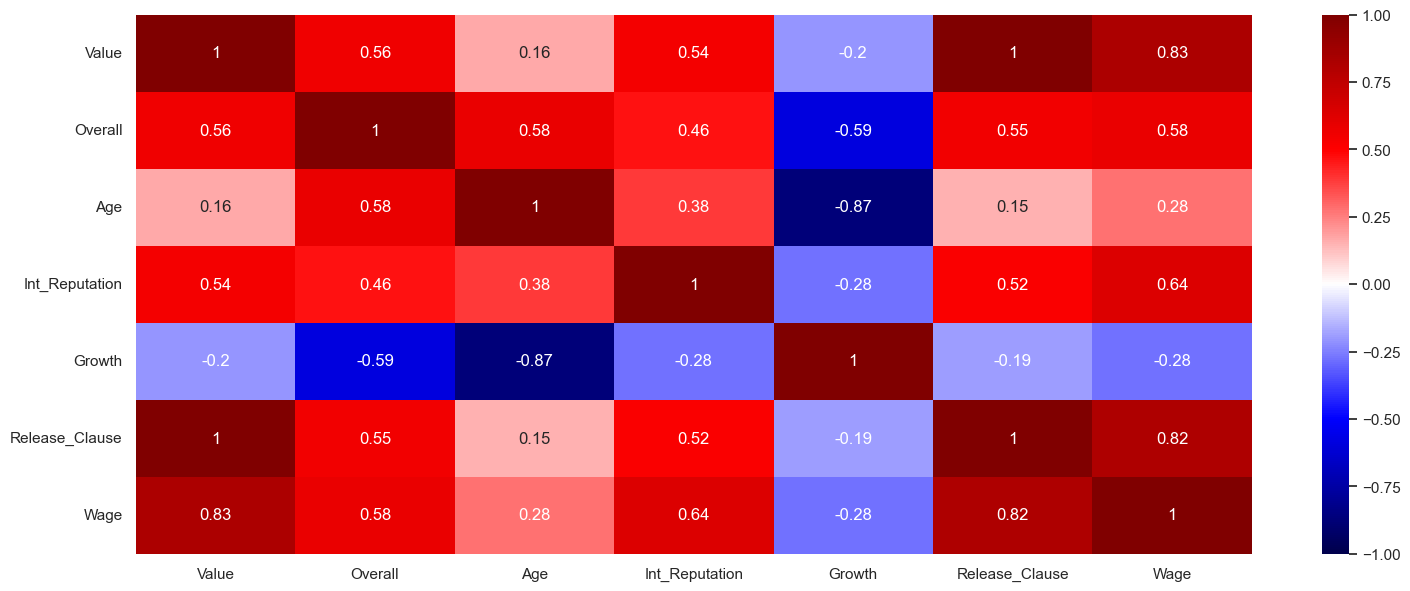

In [104]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1800x700 with 0 Axes>

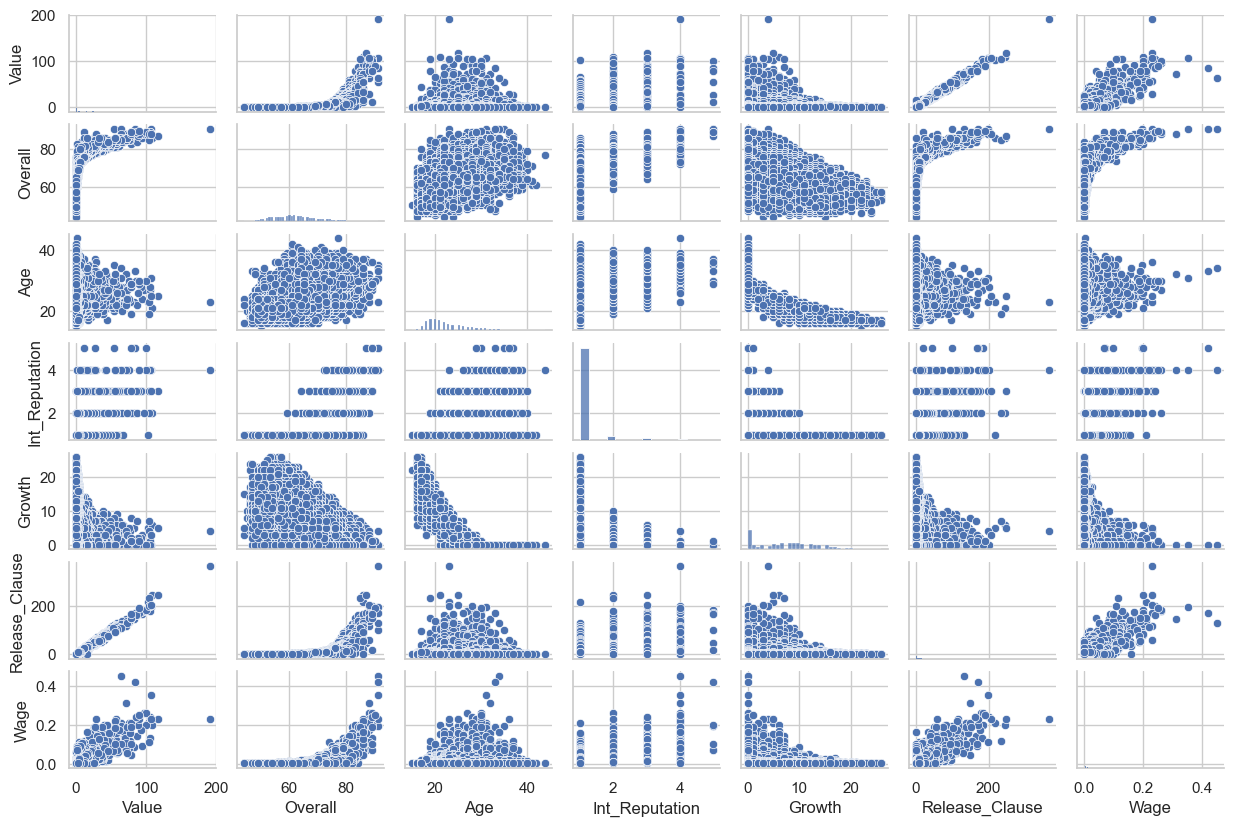

In [105]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [106]:
#Model based on most selected columns
X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

In [107]:
#Model based on most selected columns


player_model1 = sm.OLS(y, X, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.459e+05
Date:                Thu, 11 May 2023   Prob (F-statistic):                        0.00
Time:                        19:39:09   Log-Likelihood:                         -16070.
No. Observations:               16060   AIC:                                  3.215e+04
Df Residuals:                   16054   BIC:                                  3.220e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


Ridge regression, Lasso regression, and Polynomial regression are all regression techniques used in machine learning to model the relationship between a dependent variable and one or more independent variables. Here's a brief overview of each technique:

Ridge Regression: Ridge regression is a linear regression technique that is used to prevent overfitting of the model. It adds a penalty term to the least squares objective function so that the coefficients of the independent variables are reduced. The penalty term is controlled by a hyperparameter called the regularization parameter, which determines the strength of the penalty.

Lasso Regression: Lasso regression, like ridge regression, is also used to prevent overfitting of the model. However, it uses a different penalty term called the L1 penalty, which results in some of the coefficients of the independent variables being set to zero. This makes Lasso regression useful for feature selection, as it can identify which independent variables are most important for predicting the dependent variable.

Polynomial Regression: Polynomial regression is a nonlinear regression technique that involves fitting a polynomial function to the data. It can be used to model more complex relationships between the independent and dependent variables than linear regression. Polynomial regression involves adding polynomial terms of higher degrees to the regression equation. For example, a quadratic polynomial regression model would have a term for x, x^2, and a constant.

All three techniques can be used to improve the performance of a linear regression model by addressing issues like overfitting and underfitting. The choice of which technique to use depends on the specific problem and the characteristics of the data.

In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Add constant to predictors for intercept term
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Calculate R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared:.3f}")

# Calculate RMSE
y_pred = model.predict(X)
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

# Calculate AIC and BIC
n = len(y)
k = len(X.columns)
aic = 2*k - 2*np.log(model.llf)
bic = np.log(n)*k - 2*np.log(model.llf)
print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.128e+05
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        19:39:32   Log-Likelihood:                -16070.
No. Observations:               16060   AIC:                         3.215e+04
Df Residuals:                   16053   BIC:                         3.221e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0366      0.086     -0.

C:\Users\adhna\AppData\Local\Temp\ipykernel_2464\922826320.py:24: RuntimeWarning: invalid value encountered in log
  aic = 2*k - 2*np.log(model.llf)
C:\Users\adhna\AppData\Local\Temp\ipykernel_2464\922826320.py:25: RuntimeWarning: invalid value encountered in log
  bic = np.log(n)*k - 2*np.log(model.llf)


In [124]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Ridge regression model with cross-validation to select the regularization parameter
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Make predictions on the test set and calculate evaluation metrics
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = len(ridge.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(ridge.alpha_))
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Cross-validated R-squared: 0.9915
Cross-validated RMSE: 0.65
R-squared: 0.9904
RMSE: 0.70
AIC: -2287.35
BIC: -2244.83
Regularization parameter (alpha): 0.10
Coefficients: [ 5.42654305e-04 -2.20503059e-02  6.22759208e-01 -2.41343426e-02
  4.94786626e-01  7.76321413e+00]
Intercept: 0.04285555170058508


In [125]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model with cross-validation to select the regularization parameter
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5, max_iter=10000)
lasso.fit(X_train, y_train)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Make predictions on the test set and calculate evaluation metrics
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.count_nonzero(lasso.coef_) + 1 # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Regularization parameter (alpha): {:.2f}".format(lasso.alpha_))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Cross-validated R-squared: 0.9906
Cross-validated RMSE: 0.69
R-squared: 0.9904
RMSE: 0.70
AIC: -2291.42
BIC: -2261.05
Regularization parameter (alpha): 0.10
Coefficients: [ 0.00672834  0.00610765  0.         -0.00824959  0.50904173  0.        ]
Intercept: -0.44285195830461754


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline to transform the predictor variables into polynomial features and fit a linear regression model
polyreg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(polyreg, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(polyreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = polyreg.named_steps['poly'].fit_transform(X_train).shape[1] # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Coefficients:", polyreg.named_steps['reg'].coef_)


Cross-validated R-squared: 0.9932
Cross-validated RMSE: 0.59
R-squared: 0.9934
RMSE: 0.58
AIC: -3428.79
BIC: -3258.70
Coefficients: [ 1.51665554e-09 -3.99300690e-01  5.17428917e-01  1.93560972e+00
  1.86728081e-01 -5.82081424e-01 -1.93610665e+02  4.47982016e-03
 -4.56465742e-03  1.75717256e-02 -3.34343041e-04  1.44014691e-02
  3.03624737e+00 -2.67575953e-03 -8.99236327e-02 -3.01510801e-03
 -5.30598164e-03 -4.26122201e-01 -3.05693209e-02 -3.94101769e-02
  4.85086661e-03 -5.11017450e+00 -2.14432249e-03 -9.70549454e-04
 -6.93305478e-01 -3.70595450e-04 -9.87187522e-02 -1.30090460e+02]


For Finding best model we go with Decision tree regression and random forest regression. These are both machine learning techniques used for regression tasks, which involve predicting a continuous target variable based on one or more predictor variables.

Decision tree regression is a supervised learning method that uses a tree-like model to make predictions. The tree consists of decision nodes that split the data based on the values of the predictor variables, and leaf nodes that contain the predicted values for the target variable. During training, the decision tree is constructed by recursively splitting the data into subsets based on the predictor variables that result in the greatest reduction in the variance of the target variable. The resulting tree can be used to make predictions for new data points by traversing the tree from the root node to a leaf node and outputting the predicted value.

One limitation of decision tree regression is that it is prone to overfitting, which occurs when the model is too complex and fits the training data too closely, leading to poor generalization to new data. To address this issue, random forest regression can be used.

Random forest regression is an ensemble learning method that combines multiple decision tree models to improve the accuracy and reduce the variance of the predictions. During training, a random subset of the training data is sampled with replacement to create a new training set for each tree in the forest. Additionally, a random subset of the predictor variables is selected at each node to determine the best split, which helps to reduce the correlation between the trees and improve their diversity. The final prediction is obtained by averaging the predictions of all the trees in the forest.

Random forest regression has several advantages over decision tree regression. It is less prone to overfitting, more robust to outliers and missing data, and can handle high-dimensional data with many predictor variables. Additionally, it can provide estimates of the variable importance, which can be used for feature selection or interpretation.

However, random forest regression can be computationally intensive and may require tuning of hyperparameters such as the number of trees and the number of predictor variables sampled at each node.

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]
# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a decision tree regression model with a maximum depth of 3
tree = DecisionTreeRegressor(max_depth=3, random_state=42)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = tree.tree_.node_count # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", tree.feature_importances_)

Cross-validated R-squared: 0.9531
Cross-validated RMSE: 1.53
R-squared: 0.9573
RMSE: 1.48
AIC: 2527.58
BIC: 2618.70
Feature importances: [0. 0. 0. 0. 1. 0.]


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]
# Assume X and y are the predictor and response variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest regression model with 100 trees and a maximum depth of 3
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Cross-validate the model and print the mean R-squared and RMSE
cv_r2 = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Cross-validated R-squared: {:.4f}".format(np.mean(cv_r2)))
print("Cross-validated RMSE: {:.2f}".format(np.mean(cv_rmse)))

# Fit the model to the training data and make predictions on the test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute AIC and BIC
n = len(y_test)
k = np.sum([tree.tree_.node_count for tree in rf.estimators_]) # number of model parameters, including the intercept
mse = np.mean((y_test - y_pred) ** 2) # mean squared error
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + k * np.log(n)

# Print evaluation metrics and other information about the model
print("R-squared: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("AIC: {:.2f}".format(aic))
print("BIC: {:.2f}".format(bic))
print("Feature importances:", rf.feature_importances_)

Cross-validated R-squared: 0.9712
Cross-validated RMSE: 1.17
R-squared: 0.9807
RMSE: 0.99
AIC: 2948.23
BIC: 12060.20
Feature importances: [8.85870496e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.99114130e-01 0.00000000e+00]


PCA (Principal Component Analysis) is a commonly used technique in data analysis and machine learning for reducing the dimensionality of a dataset while preserving its key features. The goal of PCA is to transform a high-dimensional dataset into a lower-dimensional space, while retaining as much of the original variance as possible.

The PCA model works by finding the principal components of a dataset, which are new variables that are linear combinations of the original variables. These principal components are orthogonal to each other and are sorted in descending order of their variance, so that the first principal component captures the most variance in the data, the second captures the second-most variance, and so on. By keeping only the top-k principal components, we can reduce the dimensionality of the dataset to k dimensions.

PCA is useful for several purposes, including visualization, noise reduction, and feature extraction. In visualization, PCA can be used to plot high-dimensional data in a lower-dimensional space that can be easily visualized, such as a 2D or 3D plot. In noise reduction, PCA can be used to remove the noise from a dataset by keeping only the principal components that capture the signal and discarding the rest. In feature extraction, PCA can be used to identify the most important features in a dataset by examining the weights of the original variables in the principal components.

To perform PCA, we start by standardizing the data to have zero mean and unit variance. We then compute the covariance matrix of the standardized data, which measures the pairwise correlations between the variables. Next, we compute the eigenvectors and eigenvalues of the covariance matrix, which represent the directions and magnitudes of the principal components, respectively. Finally, we select the top-k eigenvectors with the highest eigenvalues to form the reduced-dimensional space.

PCA can be implemented using various libraries in Python, such as scikit-learn, NumPy, and pandas. Once the PCA model is trained on the data, we can transform new data points into the reduced-dimensional space using the same transformation matrix obtained from the training data. PCA is a powerful tool for dimensionality reduction and can be applied to a wide range of datasets in various fields, including finance, biology, and image processing.

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
y= player_list.loc[:,"Value"]

# Standardize predictors
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build PCA model
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Print variance explained by each principal component
print(pca.explained_variance_ratio_)

# Fit linear regression model using PCA components
model = LinearRegression().fit(X_pca, y)

# Predict target variable using PCA components
y_pred = model.predict(X_pca)

# Calculate R-squared
ssr = ((y - y_pred)**2).sum()
sst = ((y - y.mean())**2).sum()
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared:.3f}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

# Calculate AIC and BIC
n = len(y)
k = pca.n_components_
llf = -n/2 * np.log(2*np.pi) - n/2 * np.log(ssr/n) - n/2
aic = 2*k - 2*llf
bic = np.log(n)*k - 2*llf
print(f"AIC: {aic:.3f}")
print(f"BIC: {bic:.3f}")

# Perform model selection using AIC and BIC
models = []
for i in range(1, k+1):
    pca_subset = PCA(n_components=i)
    X_pca_subset = pca_subset.fit_transform(X)
    model_subset = LinearRegression().fit(X_pca_subset, y)
    ssr_subset = ((y - model_subset.predict(X_pca_subset))**2).sum()
    llf_subset = -n/2 * np.log(2*np.pi) - n/2 * np.log(ssr_subset/n) - n/2
    aic_subset = 2*i - 2*llf_subset
    bic_subset = np.log(n)*i - 2*llf_subset
    models.append((model_subset, pca_subset.n_components_, aic_subset, bic_subset))

best_aic_model, best_aic_components, best_aic_aic, best_aic_bic = \
    min(models, key=lambda m: m[2])
best_bic_model, best_bic_components, best_bic_aic, best_bic_bic = \
    min(models, key=lambda m: m[3])

print(f"Best AIC model: {best_aic_model.coef_}")
print(f"Components: {best_aic_components}")
print(f"AIC: {best_aic_aic:.3f}")
print(f"BIC: {best_aic_bic:.3f}")
print(f"Best BIC model: {best_bic_model.coef_}")
print(f"Components: {best_bic_components}")
print(f"AIC: {best_bic_aic:.3f}")
print(f"BIC: {best_bic_bic:.3f}")

[0.56751807 0.24405862 0.09075568 0.0520638  0.02704359 0.01856024]
R-squared: 0.992
RMSE: 0.658
AIC: 32152.792
BIC: 32198.896
Best AIC model: [ 2.86192729  3.27349078  2.21295486  1.99811412 -4.33772283  0.96386238]
Components: 6
AIC: 32152.792
BIC: 32198.896
Best BIC model: [ 2.86192729  3.27349078  2.21295486  1.99811412 -4.33772283  0.96386238]
Components: 6
AIC: 32152.792
BIC: 32198.896


Based on the R-squared value, the polynomial regression model appears to be the best model out of the models tested, which include ridge regression, lasso regression, decision tree regression, random forest regression, and PCA.

R-squared is a commonly used metric for evaluating the goodness of fit of a regression model, and it measures the proportion of the variance in the target variable that is explained by the predictor variables. A higher R-squared value indicates a better fit of the model to the data, and thus a stronger relationship between the predictor variables and the target variable.

It is important to note that the choice of the best model depends on various factors, including the specific dataset, the problem domain, and the goals of the analysis. Each of the models tested has its own strengths and weaknesses, and may be more suitable for certain types of data or applications.

For example, ridge and lasso regression models are commonly used for handling multicollinearity and feature selection in high-dimensional datasets. Decision tree and random forest models are useful for handling non-linear relationships and interactions between variables, and can handle categorical variables without the need for one-hot encoding. PCA is useful for reducing the dimensionality of a dataset and extracting important features.

Therefore, when selecting the best model, it is important to consider not only the performance metrics such as R-squared, but also the specific requirements and constraints of the problem at hand, as well as the interpretability and complexity of the model.

To find the final model equation, we first need to select the best model based on our evaluation metrics and requirements. Let's assume that we have selected the polynomial regression model as our final model.

The equation for a polynomial regression model can be written as:

y = b0 + b1*x1 + b2*x1^2 + b3*x1^3 + ... + bn*x1^n

where y is the target variable, x1 is the predictor variable, and b0, b1, b2, b3, ..., bn are the coefficients of the polynomial terms.

To find the values of the coefficients, we need to fit the model to our training data using a method such as least squares regression. Once we have the coefficients, we can use the equation to make predictions for new data points.

Note that the degree of the polynomial (n) can be chosen based on the complexity of the relationship between the predictor variable and the target variable, as well as the trade-off between bias and variance. A higher degree polynomial can fit the training data better, but may also overfit and perform poorly on new data. Therefore, it is important to choose the degree of the polynomial carefully and evaluate the performance of the model on both the training and test data.

In summary, to find the final model equation, we need to select the best model based on our evaluation metrics and requirements, fit the model to our training data to obtain the coefficients, and use the equation to make predictions for new data points. The specific form of the equation will depend on the type of model chosen, such as polynomial regression, decision tree regression, or random forest regression.



The resulting `df_under` and `df_over` DataFrames contain the player names, actual and predicted target variable values, and the difference between the actual and predicted values for the 10 players with the largest negative difference (i.e., the players for whom the model underestimated the target variable) and the 10 players with the largest positive difference (i.e., the players for whom the model overestimated the target variable), respectively.

This DataFrame can be useful for evaluating the performance of the polynomial regression model and identifying potential areas for improvement. For example, if the model consistently underestimates the target variable for players with certain characteristics, we may need to consider adding additional predictor variables or modifying the model structure to better capture those characteristics.

In [113]:
Y_pred = polyreg.predict(X)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y, 'Predicted': Y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)

In [114]:
df_under

,Actual,Predicted,Difference
Name,,,
J. Oblak,79.0,93.25,-14.25
T. Courtois,90.0,101.35,-11.35
Pedri,104.5,113.91,-9.41
Vinícius Jr.,109.0,117.20,-8.20
A. Tchouaméni,53.5,60.45,-6.95
B. Saka,65.5,72.12,-6.62
Rodrygo,58.5,64.65,-6.15
Unai Simón,37.0,43.15,-6.15
F. Kessié,47.5,53.58,-6.08


In [115]:
df_over

,Actual,Predicted,Difference
Name,,,
C. Nkunku,94.0,87.52,6.48
K. Mbappé,190.5,184.02,6.48
D. Hancko,27.0,20.35,6.65
V. Osimhen,82.5,75.62,6.88
L. Geertruida,30.0,22.65,7.35
21 M. Zaracho,17.0,9.40,7.60
I. Sangaré,35.5,27.74,7.76
O. Kökçü,39.5,31.51,7.99
17 Victor Valdés,13.0,3.47,9.53


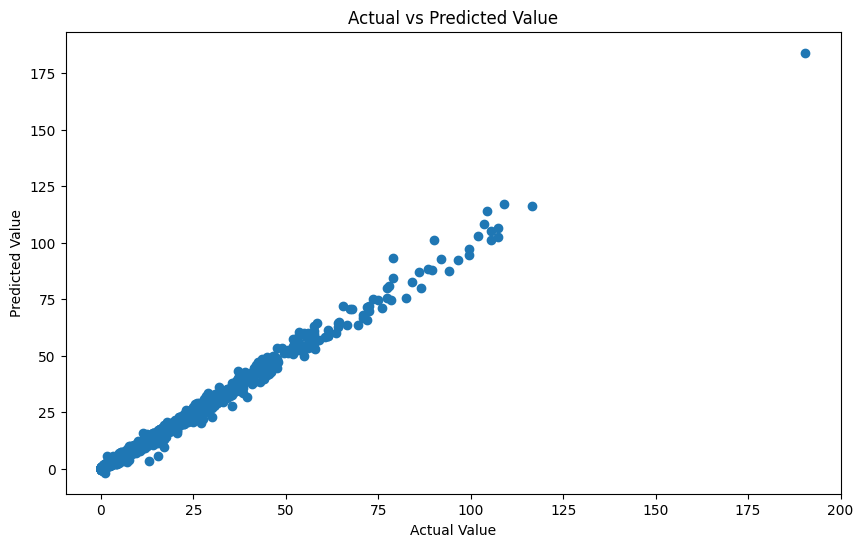

In [118]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(y, Y_pred)
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()